# Decision Variables vs Inputs: What You Control vs What You Know

This notebook demonstrates a fundamental distinction in prescriptive analytics: **decision variables** (what you control) versus **inputs** (what you know or can estimate).

Understanding this distinction is critical because:
- **Decision variables** are what the model will determine for you
- **Inputs** are information you provide to the model
- Confusing these leads to models that cannot be solved or answer the wrong question


## Key Concepts

**Decision Variables** are the choices you make:
- What you control
- What the model will determine
- Examples: How many units to produce, which suppliers to use, how many staff to schedule

**Inputs** are information you use:
- What you know or can estimate
- What you provide to the model
- Examples: Demand forecasts, cost estimates, capacity limits, historical data

**Critical insight**: You control decision variables; you observe or estimate inputs. The model finds the best values for variables given the inputs you provide.


## Scenario: Production Planning Decision

You manage a factory that produces two products: Widget A and Widget B. You need to decide how many units of each to produce next month.

**Decision variables** (what you control):
- How many units of Widget A to produce
- How many units of Widget B to produce

**Inputs** (what you know):
- Demand forecast for Widget A: 1,000 units
- Demand forecast for Widget B: 800 units
- Profit per unit of Widget A: $50
- Profit per unit of Widget B: $40
- Production capacity: 2,000 total units
- Labor hours available: 1,500 hours
- Labor hours per Widget A: 0.5 hours
- Labor hours per Widget B: 0.8 hours


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.


In [1]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value


## Step 3: Define Inputs (What You Know)

These are values you provide to the model. They represent information you have or can estimate:


In [3]:
# INPUTS: Information you know or can estimate
# These are NOT decision variables - you provide these values

demand_A = 1000  # Forecasted demand for Widget A
demand_B = 800   # Forecasted demand for Widget B

profit_A = 50    # Profit per unit of Widget A ($)
profit_B = 40    # Profit per unit of Widget B ($)

capacity = 2000   # Total production capacity (units)
labor_hours = 1500  # Available labor hours

labor_per_A = 0.5  # Labor hours per Widget A
labor_per_B = 0.8  # Labor hours per Widget B

print("INPUTS (What you know):")
print(f"  Demand A: {demand_A} units")
print(f"  Demand B: {demand_B} units")
print(f"  Profit per A: ${profit_A}")
print(f"  Profit per B: ${profit_B}")
print(f"  Capacity: {capacity} units")
print(f"  Labor hours: {labor_hours} hours")


INPUTS (What you know):
  Demand A: 1000 units
  Demand B: 800 units
  Profit per A: $50
  Profit per B: $40
  Capacity: 2000 units
  Labor hours: 1500 hours


## Step 4: Define Decision Variables (What You Control)

These are the choices the model will determine for you:


In [4]:
# Create optimization model
model = LpProblem("Production_Planning", LpMaximize)

# DECISION VARIABLES: What the model will determine
# These are what you control - the model finds the best values

produce_A = LpVariable("produce_A", lowBound=0, cat='Integer')  # Units of A to produce
produce_B = LpVariable("produce_B", lowBound=0, cat='Integer')  # Units of B to produce

print("DECISION VARIABLES (What the model will determine):")
print(f"  {produce_A.name}: Units of Widget A to produce")
print(f"  {produce_B.name}: Units of Widget B to produce")
print("\nNote: The model will find the best values for these variables.")


DECISION VARIABLES (What the model will determine):
  produce_A: Units of Widget A to produce
  produce_B: Units of Widget B to produce

Note: The model will find the best values for these variables.


## Step 5: Use Inputs to Build the Model

Notice how we use the INPUTS (what we know) to define the objective and constraints, but the DECISION VARIABLES (what we control) are what the model optimizes:


In [5]:
# Objective: Maximize profit
# Uses INPUTS (profit_A, profit_B) and DECISION VARIABLES (produce_A, produce_B)
model += profit_A * produce_A + profit_B * produce_B, "Total_Profit"

# Constraints: Use INPUTS to define limits
# Capacity constraint: Uses INPUT (capacity) and DECISION VARIABLES
model += produce_A + produce_B <= capacity, "Capacity_Limit"

# Labor constraint: Uses INPUTS (labor_hours, labor_per_A, labor_per_B) and DECISION VARIABLES
model += labor_per_A * produce_A + labor_per_B * produce_B <= labor_hours, "Labor_Limit"

# Demand constraints: Uses INPUTS (demand_A, demand_B) and DECISION VARIABLES
model += produce_A <= demand_A, "Demand_A_Limit"
model += produce_B <= demand_B, "Demand_B_Limit"

print("Model created!")
print("\nThe model uses:")
print("  - INPUTS (what you know) to define constraints and objective coefficients")
print("  - DECISION VARIABLES (what you control) to find the best solution")


Model created!

The model uses:
  - INPUTS (what you know) to define constraints and objective coefficients
  - DECISION VARIABLES (what you control) to find the best solution


## Step 6: Solve the Model

The model finds the best values for the DECISION VARIABLES given the INPUTS:


In [6]:
# Solve the model
model.solve()

# Get the solution values for DECISION VARIABLES
solution_A = value(produce_A)
solution_B = value(produce_B)
total_profit = value(model.objective)

print("SOLUTION (Model-determined values for DECISION VARIABLES):")
print(f"  Produce {solution_A:.0f} units of Widget A")
print(f"  Produce {solution_B:.0f} units of Widget B")
print(f"  Total Profit: ${total_profit:,.0f}")
print("\nThe model determined these values based on the INPUTS you provided.")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/40c5b2c197704544a22eb918f6bba0fd-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/40c5b2c197704544a22eb918f6bba0fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 22 RHS
At line 27 BOUNDS
At line 30 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 82000 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -82000 to -1.79769e+308
Probing was tried 0 times and creat

## Step 7: Visual Comparison

Let's visualize the difference between INPUTS (what you know) and DECISION VARIABLES (what the model determines):


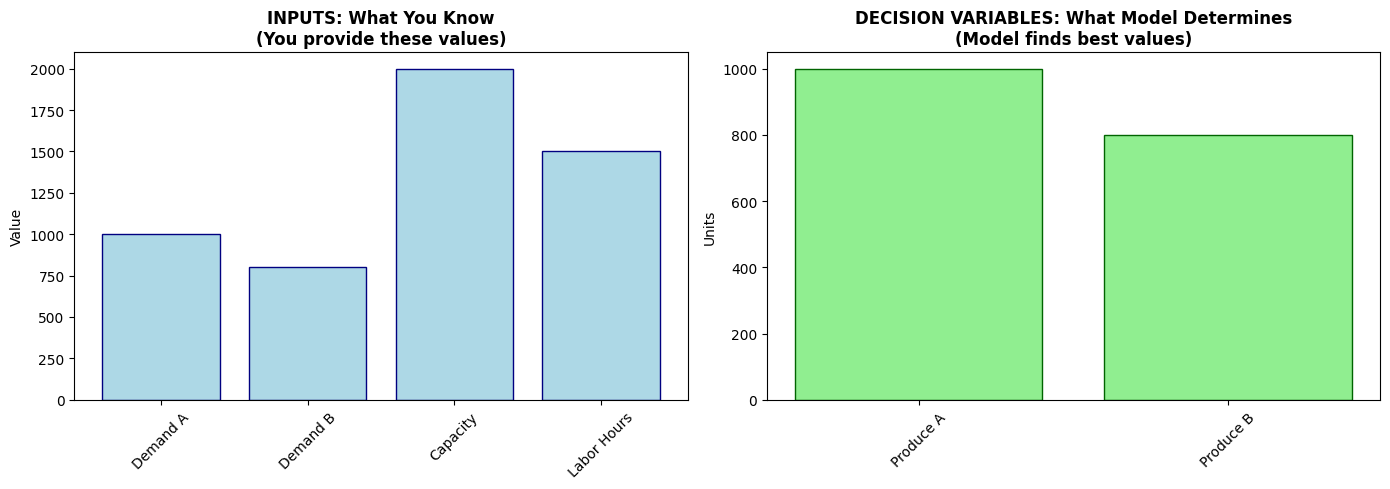


Key Insight:
  - INPUTS are fixed values you provide:
    * Demand A: 1000 units (forecast)
    * Demand B: 800 units (forecast)
    * Capacity: 2000 units (constraint)
  - DECISION VARIABLES are what the model optimizes:
    * Produce A: 1000 units (model determined)
    * Produce B: 800 units (model determined)
  - The model found the best values (1000 A, 800 B) given the inputs
    This results in total profit of $82,000


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: INPUTS (what you know)
inputs_data = {
    'Demand A': demand_A,
    'Demand B': demand_B,
    'Capacity': capacity,
    'Labor Hours': labor_hours
}

ax1.bar(inputs_data.keys(), inputs_data.values(), color='lightblue', edgecolor='navy')
ax1.set_title('INPUTS: What You Know\n(You provide these values)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Value')
ax1.tick_params(axis='x', rotation=45)

# Right plot: DECISION VARIABLES (what model determines)
variables_data = {
    'Produce A': solution_A,
    'Produce B': solution_B
}

ax2.bar(variables_data.keys(), variables_data.values(), color='lightgreen', edgecolor='darkgreen')
ax2.set_title('DECISION VARIABLES: What Model Determines\n(Model finds best values)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Units')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - INPUTS are fixed values you provide:")
print(f"    * Demand A: {demand_A} units (forecast)")
print(f"    * Demand B: {demand_B} units (forecast)")
print(f"    * Capacity: {capacity} units (constraint)")
print(f"  - DECISION VARIABLES are what the model optimizes:")
print(f"    * Produce A: {solution_A:.0f} units (model determined)")
print(f"    * Produce B: {solution_B:.0f} units (model determined)")
print(f"  - The model found the best values ({solution_A:.0f} A, {solution_B:.0f} B) given the inputs")
print(f"    This results in total profit of ${total_profit:,.0f}")


## Step 8: What Happens If Inputs Change?

Since INPUTS are what you know, they might change. Let's see what happens if demand forecasts change:


In [8]:
# Scenario 2: Different demand forecasts (INPUTS changed)
new_demand_A = 1500
new_demand_B = 600

# Create new model with new inputs
model2 = LpProblem("Production_Planning_Scenario2", LpMaximize)

# Same decision variables (what we control)
produce_A2 = LpVariable("produce_A2", lowBound=0, cat='Integer')
produce_B2 = LpVariable("produce_B2", lowBound=0, cat='Integer')

# Same objective structure, but uses new inputs
model2 += profit_A * produce_A2 + profit_B * produce_B2, "Total_Profit"

# Constraints with new input values
model2 += produce_A2 + produce_B2 <= capacity, "Capacity_Limit"
model2 += labor_per_A * produce_A2 + labor_per_B * produce_B2 <= labor_hours, "Labor_Limit"
model2 += produce_A2 <= new_demand_A, "Demand_A_Limit"  # NEW INPUT
model2 += produce_B2 <= new_demand_B, "Demand_B_Limit"  # NEW INPUT

# Solve
model2.solve()

solution_A2 = value(produce_A2)
solution_B2 = value(produce_B2)
total_profit2 = value(model2.objective)

# Compare scenarios
comparison = pd.DataFrame({
    'Scenario': ['Original Inputs', 'Changed Inputs'],
    'Demand A (Input)': [demand_A, new_demand_A],
    'Demand B (Input)': [demand_B, new_demand_B],
    'Produce A (Variable)': [solution_A, solution_A2],
    'Produce B (Variable)': [solution_B, solution_B2],
    'Total Profit': [total_profit, total_profit2]
})

print("COMPARISON: How Changing INPUTS Affects DECISION VARIABLES")
print("=" * 70)
display(comparison)

print("\nKey Insight:")
print("  - When INPUTS change, the optimal values for DECISION VARIABLES change:")
print(f"    * Original: Demand A={demand_A}, Demand B={demand_B} → Produce A={solution_A:.0f}, B={solution_B:.0f}, Profit=${total_profit:,.0f}")
print(f"    * Changed: Demand A={new_demand_A}, Demand B={new_demand_B} → Produce A={solution_A2:.0f}, B={solution_B2:.0f}, Profit=${total_profit2:,.0f}")
print(f"  - Notice: When demand A increased from {demand_A} to {new_demand_A} and demand B decreased from {demand_B} to {new_demand_B},")
print(f"    the model changed production: A increased from {solution_A:.0f} to {solution_A2:.0f}, B decreased from {solution_B:.0f} to {solution_B2:.0f}")
print(f"  - The model finds new best values based on new inputs, resulting in profit change from ${total_profit:,.0f} to ${total_profit2:,.0f}")
print("  - This is why good inputs are essential for good decisions - wrong inputs lead to wrong recommendations")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/cb4e329ef3e8461aa1e98b32433da342-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/cb4e329ef3e8461aa1e98b32433da342-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 22 RHS
At line 27 BOUNDS
At line 30 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 95000 - 0.00 seconds
Cgl0004I processed model has 1 rows, 2 columns (2 integer (0 of which binary)) and 2 elements
Cutoff increment increased from 1e-05 to 9.9999
Cbc0012I Integer solution of -95000 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 

COMPARISON: How Changing INPUTS Affects DECISION VARIABLES


,Scenario,Demand A (Input),Demand B (Input),Produce A (Variable),Produce B (Variable),Total Profit
0,Original Inputs,1000,800,1000.0,800.0,82000.0
1,Changed Inputs,1500,600,1500.0,500.0,95000.0



Key Insight:
  - When INPUTS change, the optimal values for DECISION VARIABLES change:
    * Original: Demand A=1000, Demand B=800 → Produce A=1000, B=800, Profit=$82,000
    * Changed: Demand A=1500, Demand B=600 → Produce A=1500, B=500, Profit=$95,000
  - Notice: When demand A increased from 1000 to 1500 and demand B decreased from 800 to 600,
    the model changed production: A increased from 1000 to 1500, B decreased from 800 to 500
  - The model finds new best values based on new inputs, resulting in profit change from $82,000 to $95,000
  - This is why good inputs are essential for good decisions - wrong inputs lead to wrong recommendations


## Summary: Decision Variables vs Inputs

**Decision Variables** (what you control):
- The choices the model determines
- Examples: Production quantities, staffing levels, route selections
- The model finds the best values for these

**Inputs** (what you know):
- Information you provide to the model
- Examples: Demand forecasts, costs, capacities, constraints
- These are fixed values (or estimates) that the model uses

**Critical Distinction**:
- You **control** decision variables (the model finds best values)
- You **observe or estimate** inputs (you provide these values)
- Confusing these leads to models that cannot be solved or answer the wrong question

**Practical Implication**:
- Good inputs lead to good decisions
- If inputs are wrong, even perfect optimization will produce wrong recommendations
- Always verify that you've correctly identified what you control (variables) vs what you know (inputs)
